/var/folders/sb/5tl4tdm979n1q9h6_xxmy3qm0000gn/T/ipykernel_26575/2511147407.py:22: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, header=None, names=col_names)


Columns loaded: ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_dst_src_ltm', 'ct_src_dst_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm_2', 'ct_dst_ltm_2', 'ct_src_dst_ltm_2', 'is_sm_ips_ports', 'attack_cat', 'label', 'feat_40', 'feat_41', 'feat_42', 'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48']
First 5 rows:
         srcip  sport          dstip dsport proto state       dur  sbytes  \
0  59.166.0.0   1390  149.171.126.6     53   udp   CON  0.001055     132   
1  59.166.0.0  33661  149.171.126.9   1024   udp   CON  0.036133     528   
2  59.166.0.6   1464  149.171.126.7     53   udp   CON  0.001119     146   
3  59.166.0.5   3593  149.171.126.5     53   udp   CON  0.001209     132  

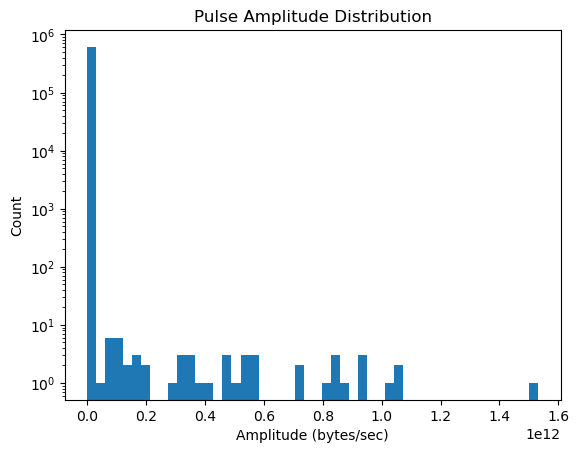

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 49 column names adapted for UNSW-NB15; change/add/remove names if your CSV structure differs!
col_names = [
    'srcip', 'sport', 'dstip', 'dsport', 'proto',
    'state', 'dur', 'sbytes', 'dbytes', 'sttl',
    'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
    'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb',
    'smeansz', 'dmeansz', 'trans_depth', 'response_body_len',
    'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
    'ct_dst_src_ltm', 'ct_src_dst_ltm', 'is_ftp_login',
    'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm_2',
    'ct_dst_ltm_2', 'ct_src_dst_ltm_2', 'is_sm_ips_ports',
    'attack_cat', 'label', 'feat_40', 'feat_41', 'feat_42',
    'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48'
]

# Load the CSV WITHOUT header, applying these names
data_path = 'data/UNSW-NB15/UNSW-NB15.csv'
df = pd.read_csv(data_path, header=None, names=col_names)

print("Columns loaded:", df.columns.tolist())
print("First 5 rows:\n", df.head())

# Create a unique flow ID from conventional fields
df['flow_id'] = (
    df['srcip'].astype(str) + '-' +
    df['sport'].astype(str) + '-' +
    df['dstip'].astype(str) + '-' +
    df['dsport'].astype(str) + '-' +
    df['proto'].astype(str)
)

# Show flow IDs and durations (or replace 'dur' with your timestamp column if required)
print("\nFlow IDs and duration (first 5 rows):\n", df[['flow_id', 'dur']].head())

grouped = df.groupby('flow_id')
agg_df = grouped.agg({
    'dur': 'sum',
    'sbytes': 'sum',
    'dbytes': 'sum',
    'label': 'max'
})
features = agg_df[['dur', 'sbytes', 'dbytes']].fillna(0)
features['amplitude'] = (features['sbytes'] + features['dbytes']) / (features['dur'] + 1e-6)

#plot a histogram of amplitude for visualisation or anomaly detection
plt.hist(features['amplitude'], bins=50, log=True)
plt.title('Pulse Amplitude Distribution')
plt.xlabel('Amplitude (bytes/sec)')
plt.ylabel('Count')
plt.show()

